<a href="https://colab.research.google.com/github/u1353279/DATA_PHD/blob/main/Hirarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
df=pd.read_excel('/content/drive/MyDrive/time.xlsx')

In [4]:
df.head()

,TIME,T,G,P
0,03:54:00,3,0.0,0.0
1,03:55:00,3,0.0,0.0
2,03:56:00,3,0.0,0.0
3,03:57:00,3,0.0,0.0
4,03:58:00,3,0.0,0.0


In [5]:
df_new=df.drop(columns=['TIME'])

In [6]:
m = df_new['T'].between(8,16,inclusive=False)
g = m.ne(m.shift()).cumsum()
df_new['G_new'] = df_new.groupby(g)['G'].transform('mean')
#export=df.to_excel(r'C:\Users\zahid.hussain\exportdata.xlsx', index=None, header=True)

In [7]:
x = df_new['T'].between(8,16,inclusive=False)
p = x.ne(x.shift()).cumsum()
df_new['P_new'] = df_new.groupby(p)['P'].transform('mean')
#export=df.to_excel(r'C:\Users\zahid.hussain\exportdata.xlsx', index=None, header=True)
df_new

,T,G,P,G_new,P_new
0,3,0.0,0.0,56.205594,123.328396
1,3,0.0,0.0,56.205594,123.328396
2,3,0.0,0.0,56.205594,123.328396
3,3,0.0,0.0,56.205594,123.328396
4,3,0.0,0.0,56.205594,123.328396
...,...,...,...,...,...
97195,21,0.0,0.0,45.375258,9.997262
97196,21,0.0,0.0,45.375258,9.997262
97197,21,0.0,0.0,45.375258,9.997262
97198,21,0.0,0.0,45.375258,9.997262


In [8]:
df_new=df_new.drop(columns=['T','G','P'])

In [9]:
z=df_new.P_new.unique()

In [10]:
p=z[1::2]

In [11]:
y=df_new.G_new.unique()

In [12]:
g=y[1::2]

In [13]:
df_new = pd.DataFrame({'g_avg':g, 'p_avg':p})
df_new

,g_avg,p_avg
0,140.108917,308.404302
1,236.312436,519.628464
2,184.061955,403.916031
3,126.781479,279.268931
4,206.944010,455.222386
...,...,...
65,136.385092,30.025310
66,286.297398,62.956717
67,301.259807,66.244266
68,136.058879,30.015204


In [14]:
df_new['avg_ratio'] = df_new['g_avg'] / df_new['p_avg']

In [15]:
df_new=df_new.drop(columns=['g_avg','p_avg'])

In [16]:
df_new = df_new.reset_index()

In [17]:
df_new.loc[df_new['avg_ratio'].idxmax()]

index        67.000000
avg_ratio     4.547711
Name: 67, dtype: float64

In [18]:
X=df_new.values

In [19]:
z=linkage(X,'single')

In [20]:
df_new['cluster']=pd.Series('single')

In [21]:
s=linkage(X,'single')

In [57]:
# settings
plt.style.use('seaborn-white')
plt.rcParams["figure.figsize"] = (7, 5)

In [58]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [66]:
import matplotlib.font_manager

In [69]:
font_setting = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 12,
}


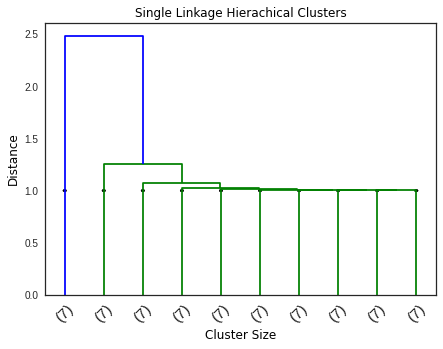

In [72]:
x=dendrogram(s,truncate_mode='lastp', p=10, leaf_rotation=45.,leaf_font_size=15., show_contracted=True)

plt.title('Single Linkage Hierachical Clusters',fontdict=font_setting)
plt.xlabel('Cluster Size',fontdict=font_setting)
plt.ylabel('Distance',fontdict=font_setting)

#plt.axhline(y=2)
#plt.axhline(y=0.5)

plt.show()